In [1]:
%matplotlib inline
%pylab
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

import datetime

# Data Visualization
import seaborn as sns
sns.set
import missingno
import matplotlib.pyplot as plt

# Modelling
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
!pip install seaborn
!pip install missingno

In [3]:
# Importing the data
data = pd.read_csv('orders.csv')

In [4]:
data.head()

,Available Drivers,Cancel Time,Order ID,Placed Time,Reject Time,Response Distance,Response Time,Service Type
0,39,NaN,1,6/8/2018 8:01:22 AM,NaN,4615.0,6/8/2018 8:01:46 AM,Van
1,68,NaN,2,6/8/2018 8:01:23 AM,NaN,4785.0,6/8/2018 8:01:56 AM,Van
2,10,NaN,3,6/8/2018 8:06:39 AM,NaN,15964.0,6/8/2018 8:07:05 AM,Van
3,76,NaN,4,6/8/2018 8:14:00 AM,NaN,2459.0,6/8/2018 8:14:09 AM,Van
4,98,NaN,5,6/8/2018 8:16:00 AM,NaN,5510.0,6/8/2018 8:16:21 AM,Van


In [5]:
# Number of columns in data 
data.columns

Index(['Available Drivers', 'Cancel Time', 'Order ID', 'Placed Time',
       'Reject Time', 'Response Distance', 'Response Time', 'Service Type'],
      dtype='object')

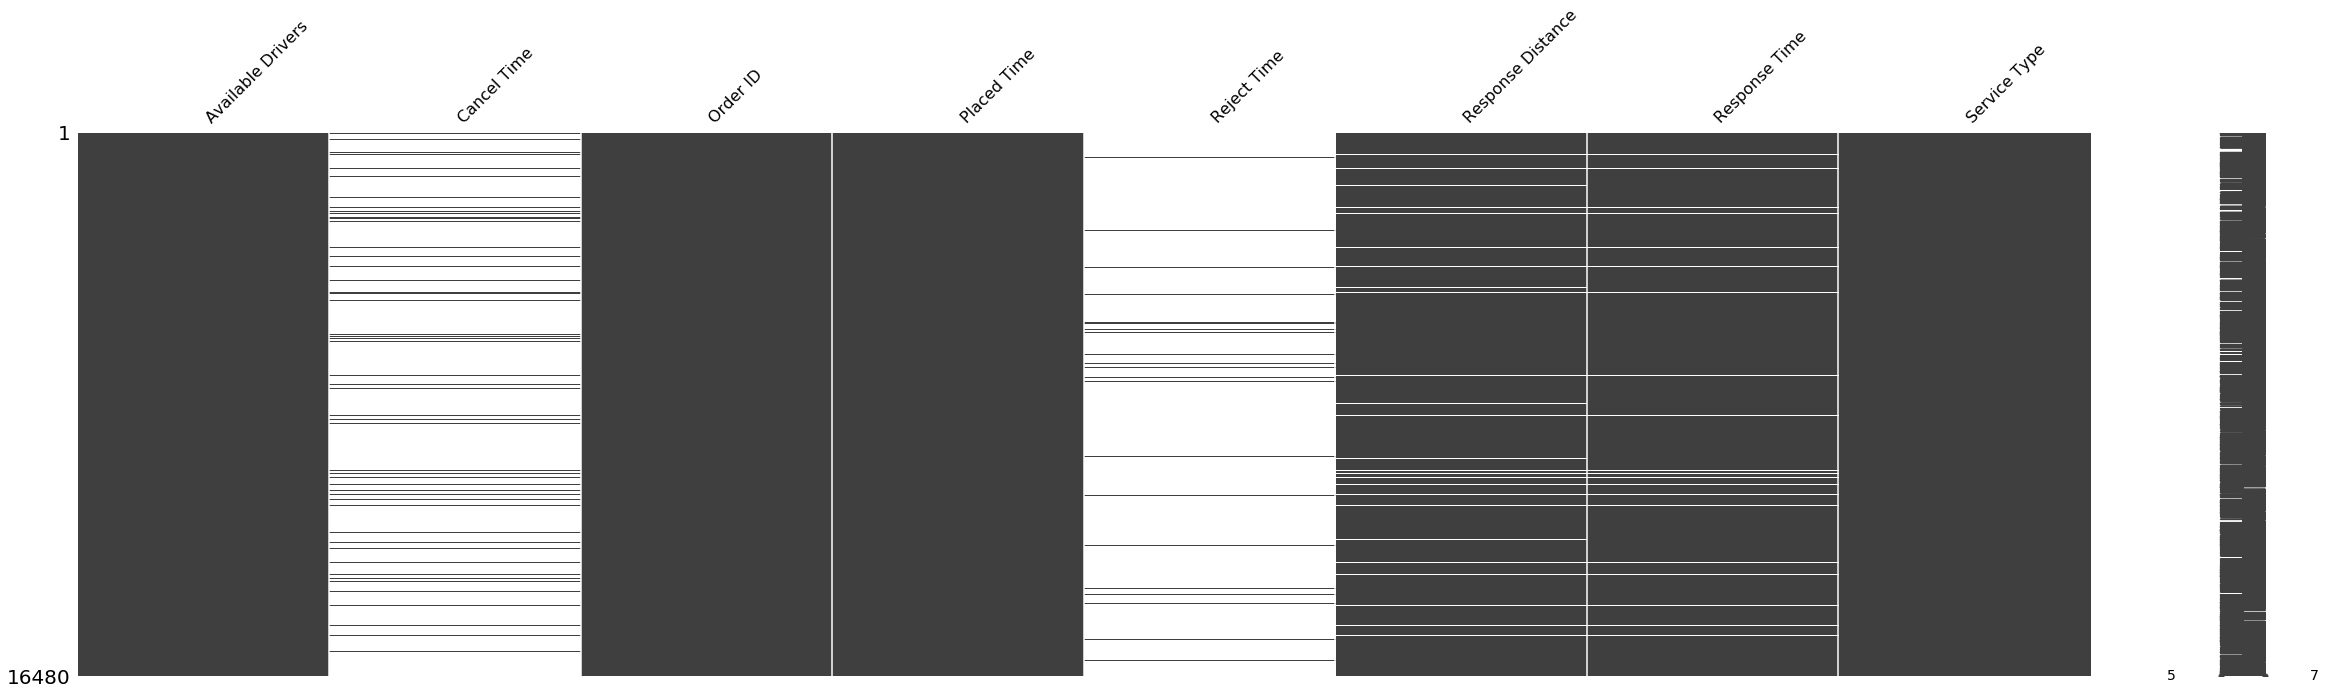

In [6]:
# Ploting missing values for each variable
missingno.matrix(data, figsize = (40,10))

 Cancel Time and Reject Time have missing values

In [7]:
# Count of null values
data.isnull().sum()

Available Drivers        0
Cancel Time          14532
Order ID                 0
Placed Time              0
Reject Time          15846
Response Distance      922
Response Time          698
Service Type             0
dtype: int64

In [8]:
# Summary of Data
data.describe()

,Available Drivers,Order ID,Response Distance
count,16480.000000,16480.000000,15558.000000
mean,113.980886,8240.500000,3773.516904
std,83.989181,4757.510554,3876.391471
min,1.000000,1.000000,3.000000
25%,42.000000,4120.750000,1883.000000
50%,101.000000,8240.500000,2921.500000
75%,169.000000,12360.250000,4253.000000
max,529.000000,16480.000000,58206.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16480 entries, 0 to 16479
Data columns (total 8 columns):
Available Drivers    16480 non-null int64
Cancel Time          1948 non-null object
Order ID             16480 non-null int64
Placed Time          16480 non-null object
Reject Time          634 non-null object
Response Distance    15558 non-null float64
Response Time        15782 non-null object
Service Type         16480 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 1.0+ MB


## Preprocessing and EDA

In [10]:
# Treating the null or NaN Values
data['Cancel Time'].fillna(0, inplace = True)
data['Reject Time'].fillna(0, inplace = True)
data['Response Time'].fillna(0, inplace = True)
data['Response Distance'] = data['Response Distance'].fillna(data['Response Distance'].mean())

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16480 entries, 0 to 16479
Data columns (total 8 columns):
Available Drivers    16480 non-null int64
Cancel Time          16480 non-null object
Order ID             16480 non-null int64
Placed Time          16480 non-null object
Reject Time          16480 non-null object
Response Distance    16480 non-null float64
Response Time        16480 non-null object
Service Type         16480 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 1.0+ MB


In [12]:
# Mapping to date time
data['Placed Time'] = data['Placed Time'].map(pd.to_datetime)
data['Response Time'] = data['Response Time'].map(pd.to_datetime)

In [13]:
# Finding the hour,time,day of the month
data['Hour'] = data['Placed Time'].dt.hour
data['DayOfmonth'] = data['Placed Time'].dt.day
data['Weekday'] = data['Placed Time'].dt.weekday

In [14]:
data.head()

,Available Drivers,Cancel Time,Order ID,Placed Time,Reject Time,Response Distance,Response Time,Service Type,Hour,DayOfmonth,Weekday
0,39,0,1,2018-06-08 08:01:22,0,4615.0,2018-06-08 08:01:46,Van,8,8,4
1,68,0,2,2018-06-08 08:01:23,0,4785.0,2018-06-08 08:01:56,Van,8,8,4
2,10,0,3,2018-06-08 08:06:39,0,15964.0,2018-06-08 08:07:05,Van,8,8,4
3,76,0,4,2018-06-08 08:14:00,0,2459.0,2018-06-08 08:14:09,Van,8,8,4
4,98,0,5,2018-06-08 08:16:00,0,5510.0,2018-06-08 08:16:21,Van,8,8,4


In [15]:
# Counting the number of order placed in a hour
def count_rows(rows):
    return len(rows)

data.groupby('Hour').apply(count_rows)

Hour
0       24
1        9
2        6
3        4
4       10
5       55
6      174
7      401
8      747
9     1268
10    1495
11    1604
12    1322
13    1503
14    1619
15    1501
16    1381
17    1077
18     864
19     646
20     456
21     176
22      97
23      41
dtype: int64

Text(0.5, 1.0, 'Journey per hour')

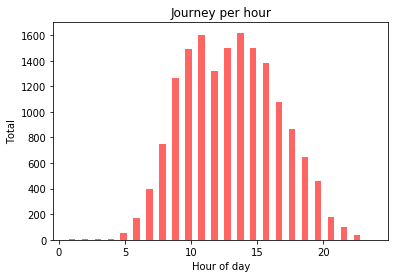

In [16]:
# Plotting the hour's of a day
hist(data.Hour,bins=24 ,rwidth=0.5, range=(0.5, 24),color='#ff6663')
xlabel('Hour of day')
ylabel('Total')
title('Journey per hour')

 With the above we can say More orders are between 9:00 am to 5:00pm

In [17]:
# Counting the number of order placed in a hour
def count_rows(rows):
    return len(rows)

by_date = data.groupby('DayOfmonth').apply(count_rows)
by_date

DayOfmonth
1      388
2      906
3      917
4     1034
5     1044
6       60
8      358
9      564
10     309
11     770
12     827
13     934
14     845
15     941
16     604
17     271
18     314
23     630
24     410
25     859
26     895
27     934
28     935
29      41
30     690
dtype: int64

Text(0.5, 1.0, 'Journey per day')

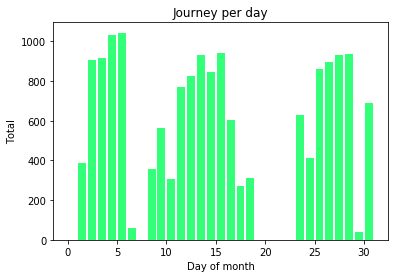

In [18]:
# Plotting the date of a month
hist(data.DayOfmonth, bins=31,rwidth=0.8, range=(0, 31),color='#33ff78')
xlabel('Day of month')
ylabel('Total')
title('Journey per day')

Text(0.5, 1.0, 'Journey by week day')

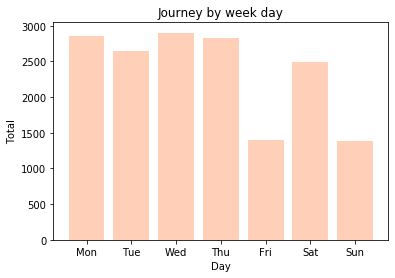

In [19]:
hist(data.Weekday, bins=7, range =(-.5,6.5), rwidth=.8, color='#ff884d', alpha=.4)
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())
xlabel('Day')
ylabel('Total')
title('Journey by week day')

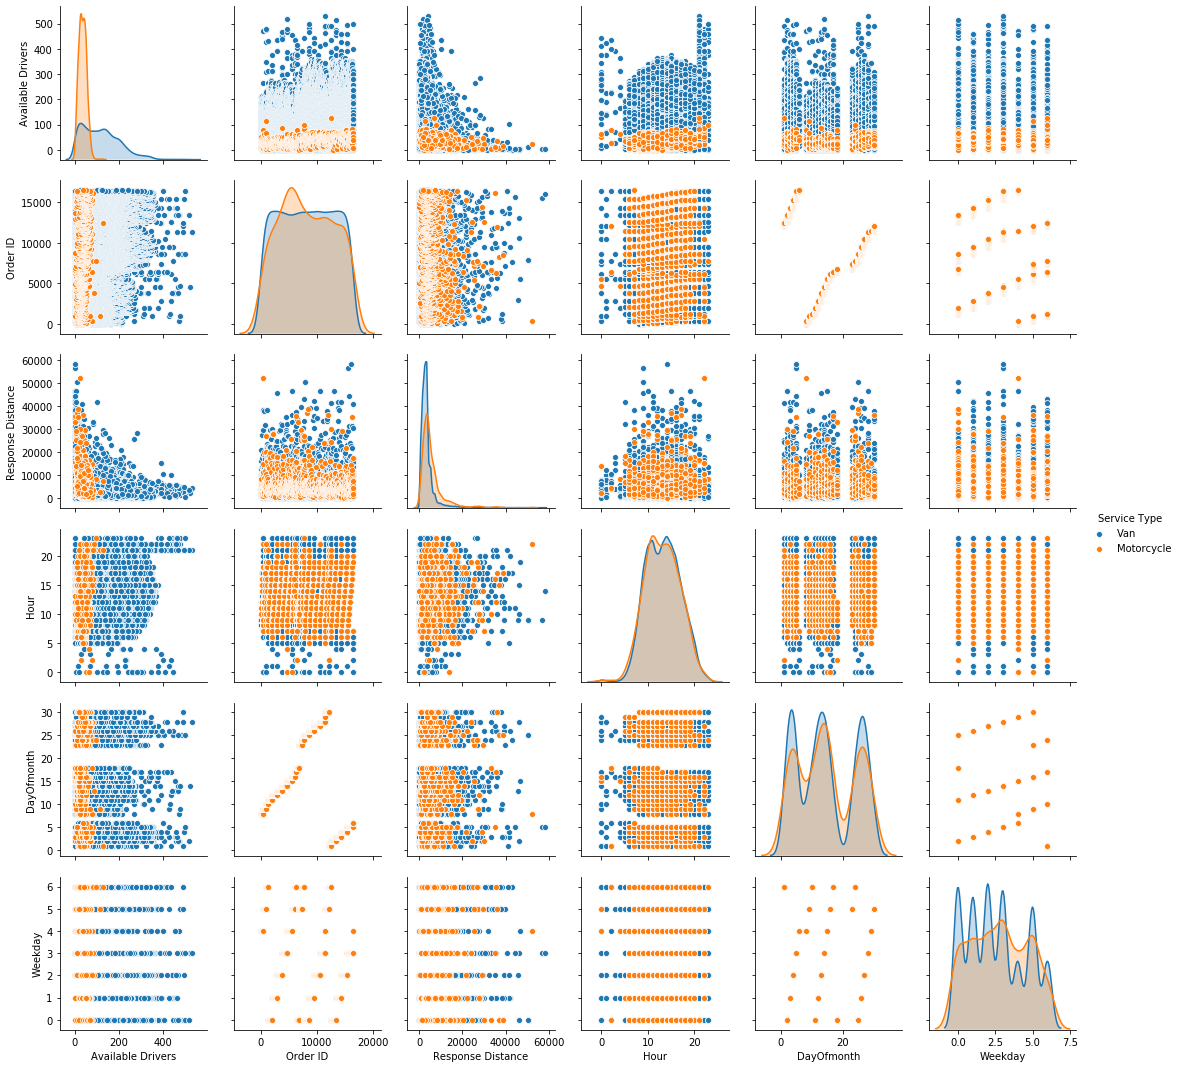

In [20]:
# Pairplot between data  and service type
sns.pairplot(data, hue="Service Type")

Text(0.5, 1.0, 'Avaiable driver on that day')

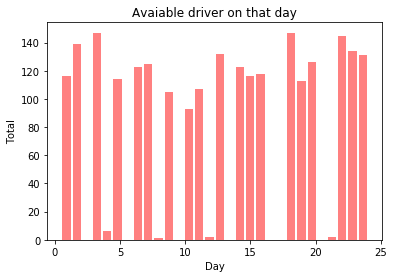

In [21]:
hist(data['Available Drivers'],bins=30 ,rwidth=0.8, range=(.5, 24),color='#ff8080')
xlabel('Day')
ylabel('Total')
title('Avaiable driver on that day')

In [22]:
# Adding some new feature  
data.loc[(data['Response Time'] == 0) & (data['Reject Time'] == 0), 'Status'] = 'Trip Cancelled'
data.loc[(data['Response Time'] != 0) & (data['Reject Time'] == 0), 'Status'] = 'Trip Cancelled'
data.loc[(data['Cancel Time'] == 0) & (data['Reject Time'] == 0), 'Status'] = 'Trip Completed'
data.loc[(data['Reject Time'] != 0), 'Status'] = 'Trip Cancelled'
data.head(6)

,Available Drivers,Cancel Time,Order ID,Placed Time,Reject Time,Response Distance,Response Time,Service Type,Hour,DayOfmonth,Weekday,Status
0,39,0,1,2018-06-08 08:01:22,0,4615.000000,2018-06-08 08:01:46,Van,8,8,4,Trip Completed
1,68,0,2,2018-06-08 08:01:23,0,4785.000000,2018-06-08 08:01:56,Van,8,8,4,Trip Completed
2,10,0,3,2018-06-08 08:06:39,0,15964.000000,2018-06-08 08:07:05,Van,8,8,4,Trip Completed
3,76,0,4,2018-06-08 08:14:00,0,2459.000000,2018-06-08 08:14:09,Van,8,8,4,Trip Completed
4,98,0,5,2018-06-08 08:16:00,0,5510.000000,2018-06-08 08:16:21,Van,8,8,4,Trip Completed
5,135,6/8/2018 8:18:24 AM,6,2018-06-08 08:18:02,0,3773.516904,1970-01-01 00:00:00,Van,8,8,4,Trip Cancelled


In [23]:
# Counting the trip status of all the request
statuscount = data[["Status","Order ID"]].groupby("Status").count()
statuscount

,Order ID
Status,
Trip Cancelled,2582
Trip Completed,13898


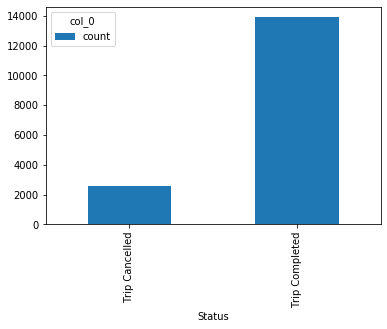

In [24]:
# Count of trip 
status = pd.crosstab(index = data["Status"], columns="count")     
status.plot.bar()

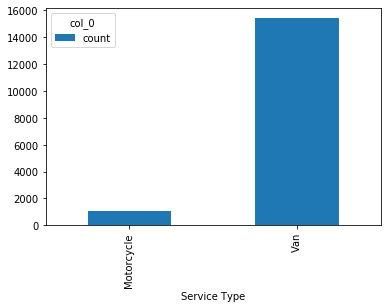

In [25]:
# Service type 
Service_ty = pd.crosstab(index = data['Service Type'], columns="count")     
Service_ty.plot.bar()

In [26]:
# Adding some more feature to it
session_labels = ['Late Night','Early Morning','Late Morning','Afternoon','Evening','Night']
data = data.assign(Session=pd.cut(data['Placed Time'].dt.hour,[-1,4,8,12,16,20,24],labels=session_labels))
data.head(6)

,Available Drivers,Cancel Time,Order ID,Placed Time,Reject Time,Response Distance,Response Time,Service Type,Hour,DayOfmonth,Weekday,Status,Session
0,39,0,1,2018-06-08 08:01:22,0,4615.000000,2018-06-08 08:01:46,Van,8,8,4,Trip Completed,Early Morning
1,68,0,2,2018-06-08 08:01:23,0,4785.000000,2018-06-08 08:01:56,Van,8,8,4,Trip Completed,Early Morning
2,10,0,3,2018-06-08 08:06:39,0,15964.000000,2018-06-08 08:07:05,Van,8,8,4,Trip Completed,Early Morning
3,76,0,4,2018-06-08 08:14:00,0,2459.000000,2018-06-08 08:14:09,Van,8,8,4,Trip Completed,Early Morning
4,98,0,5,2018-06-08 08:16:00,0,5510.000000,2018-06-08 08:16:21,Van,8,8,4,Trip Completed,Early Morning
5,135,6/8/2018 8:18:24 AM,6,2018-06-08 08:18:02,0,3773.516904,1970-01-01 00:00:00,Van,8,8,4,Trip Cancelled,Early Morning


Session Details:--
Late Night: Midnight to 4AM,
Early Morning: 4AM-8AM,
Late Morning: 8AM-Noon,
Afternoon: Noon-4PM,
Evening: 4PM-8PM,
Night: 8PM-Midnight

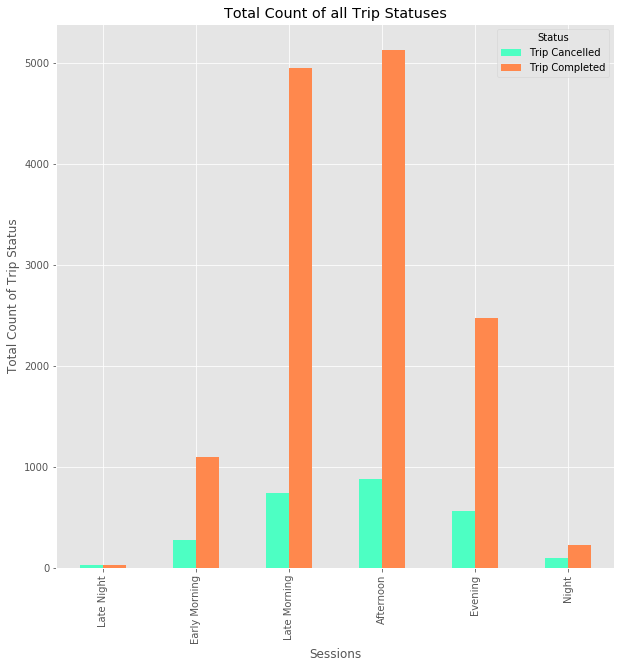

In [27]:
plt.style.use('ggplot')
colors = ["#4dffc3", "#ff884d","#000000"]
data.groupby(['Session','Status']).Status.count().unstack().plot.bar(legend=True, figsize=(10,10), color=colors)
plt.title('Total Count of all Trip Statuses')
plt.xlabel('Sessions')
plt.ylabel('Total Count of Trip Status')
plt.show()

Most of the trip completed in Late morning and afternoon and cancellation of trip also happen in this time

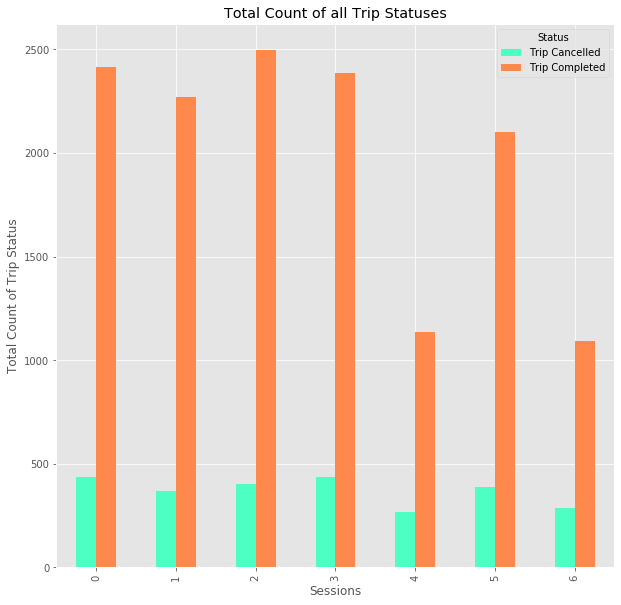

In [28]:
plt.style.use('ggplot')
colors = ["#4dffc3", "#ff884d","#000000"]
data.groupby(['Weekday','Status']).Status.count().unstack().plot.bar(legend=True, figsize=(10,10), color=colors)
plt.title('Total Count of all Trip Statuses')
plt.xlabel('Sessions')
plt.ylabel('Total Count of Trip Status')
plt.show()

In [29]:
# Convert the categorical data into numerical data
data['Service Type'] = data['Service Type'].map({'Van': 1, 'Motorcycle': 0})
data['Status'] = data['Status'].map({'Trip Completed': 1, 'Trip Cancelled': 0})
data.head()

,Available Drivers,Cancel Time,Order ID,Placed Time,Reject Time,Response Distance,Response Time,Service Type,Hour,DayOfmonth,Weekday,Status,Session
0,39,0,1,2018-06-08 08:01:22,0,4615.0,2018-06-08 08:01:46,1,8,8,4,1,Early Morning
1,68,0,2,2018-06-08 08:01:23,0,4785.0,2018-06-08 08:01:56,1,8,8,4,1,Early Morning
2,10,0,3,2018-06-08 08:06:39,0,15964.0,2018-06-08 08:07:05,1,8,8,4,1,Early Morning
3,76,0,4,2018-06-08 08:14:00,0,2459.0,2018-06-08 08:14:09,1,8,8,4,1,Early Morning
4,98,0,5,2018-06-08 08:16:00,0,5510.0,2018-06-08 08:16:21,1,8,8,4,1,Early Morning


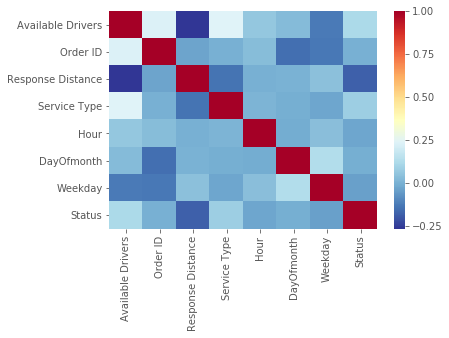

In [30]:
sns.heatmap(data.corr(),cmap="RdYlBu_r")

Cross Analysis between Weekday and hour

Text(0.5, 1, 'Status of trip by hour basis')

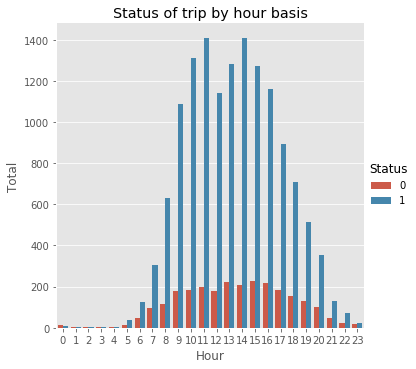

In [31]:
sns.catplot('Hour',hue='Status',data=data,kind = 'count')
xlabel('Hour')
ylabel('Total')
title('Status of trip by hour basis')

Text(0.5, 1.0, 'Total Distance covered by week day')

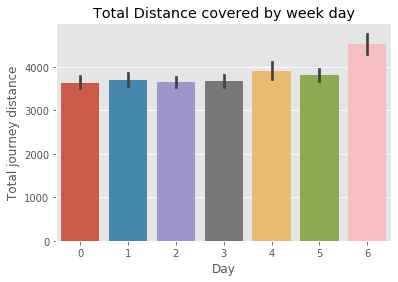

In [32]:
sns.barplot(x='Weekday',y='Response Distance',data=data)
xlabel('Day')
ylabel('Total journey distance')
title('Total Distance covered by week day')

In [65]:
x = data[['Placed Time','Response Time']]
y = data['Status']

In [66]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = 0)

### Decision tree

In [67]:
classifier = DecisionTreeClassifier(criterion='gini')
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [68]:
pred = model_Decision.predict(X_test)

In [69]:
metrics.accuracy_score(y_test,pred)

0.9340614886731392

In [70]:
print(metrics.classification_report(y,pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      2582
           1       0.96      0.96      0.96     13898

    accuracy                           0.93     16480
   macro avg       0.88      0.87      0.88     16480
weighted avg       0.93      0.93      0.93     16480



In [71]:
metrics.confusion_matrix(y,pred_Decision)

array([[ 2008,   574],
       [  500, 13398]], dtype=int64)

### RandomForest

In [40]:
model_Random = RandomForestClassifier(n_jobs = 2 ,n_estimators=50,random_state=1)
model_Random.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=2,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [41]:
pred_Random = model_Random.predict(x)

In [42]:
metrics.accuracy_score(y,pred_Random)*100

93.42839805825243

In [43]:
df1 = pd.DataFrame.from_dict({'Actual':y,'predicted':pred_Random})
df1.head()

,Actual,predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [44]:
print(metrics.classification_report(y,pred_Random))

              precision    recall  f1-score   support

           0       0.91      0.65      0.76      2582
           1       0.94      0.99      0.96     13898

    accuracy                           0.93     16480
   macro avg       0.92      0.82      0.86     16480
weighted avg       0.93      0.93      0.93     16480



In [45]:
metrics.confusion_matrix(y,pred_Random)

array([[ 1673,   909],
       [  174, 13724]], dtype=int64)